In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# import datset
churn=pd.read_csv("churn_data.csv")
cust=pd.read_csv("customer_data.csv")
internet=pd.read_csv("internet_data.csv")
churn.head(3)


,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [4]:
cust.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No


In [5]:
internet.head(3)

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No


In [6]:
# Lets check the shape of the datset
print(churn.shape)
print("-"*56)
print(cust.shape)
print("-"*56)
print(internet.shape)

(7043, 9)
--------------------------------------------------------
(7043, 5)
--------------------------------------------------------
(7043, 9)


# Combining the dataset

In [7]:
df_nw=pd.merge(churn,cust,how="inner",on="customerID")
df_nw.head(3)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No


In [8]:
df_nw.shape

(7043, 13)

In [9]:
pd.get_option("display.max_columns")

20

By default pandas disply 20 columns lets overwrite this

In [10]:
pd.set_option("display.max_columns",None)

In [11]:
df=pd.merge(df_nw,internet,how="inner",on="customerID")
df.head(2)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No


In [12]:
df.shape

(7043, 21)

# Data Analysis

#### For Knownledge practice------------- Start----------------------------------------------------------

In [151]:
val=pd.DataFrame(df1.groupby("Churn")["Churn"].count())
val["Mean"]=val["Churn"]*100/len(df1["Churn"])
val

,Churn,Mean
Churn,,
0,5163,73.421502
1,1869,26.578498


#### --------------ENDS --------------------------------------------------------------------------------------------------

In [14]:
df.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


# Lets separate categorial and numeric data

In [16]:
cat_feat=[i for i in df if df[i].dtype=="O"]
df[cat_feat].head()

,customerID,PhoneService,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn,gender,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No,Month-to-month,Yes,Electronic check,29.85,No,Female,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Yes,One year,No,Mailed check,1889.5,No,Male,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,Yes,Month-to-month,Yes,Mailed check,108.15,Yes,Male,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No,One year,No,Bank transfer (automatic),1840.75,No,Male,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Yes,Month-to-month,Yes,Electronic check,151.65,Yes,Female,No,No,No,Fiber optic,No,No,No,No,No,No


In [17]:
# Here "TotalCharges" are misclassified as object lets change it back to float
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],errors = 'coerce')

In [18]:
df["TotalCharges"].dtype

dtype('float64')

### Note-
Sometimes, we may not have a float value represented as a string. So, pd.to_numeric() function will show an error. To remove this error, we can use errors=’coerce’, to convert the value at this position to be converted to NaN. 

In [19]:
# checking again for null values
df.isnull().sum()

customerID           0
tenure               0
PhoneService         0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
dtype: int64

In [20]:
cat_feat=[i for i in df if df[i].dtype=="O"]
df[cat_feat].head(2)

,customerID,PhoneService,Contract,PaperlessBilling,PaymentMethod,Churn,gender,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No,Month-to-month,Yes,Electronic check,No,Female,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Yes,One year,No,Mailed check,No,Male,No,No,No,DSL,Yes,No,Yes,No,No,No


In [21]:
# Numeric features
num_feat=[i for i in df.columns if i not in cat_feat]
df[num_feat].head(3)

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
0,1,29.85,29.85,0
1,34,56.95,1889.50,0
2,2,53.85,108.15,0


In [22]:
# Again separet discrete and categoraial features
cont_feat=[i for i in num_feat if len(df[i].unique())>25]
cont_feat

['tenure', 'MonthlyCharges', 'TotalCharges']

In [23]:
len(df["tenure"].unique())

73

In [24]:
# Discrete feature
dis_feat=df["SeniorCitizen"]


# Data Visualization

In [25]:
visual=df.copy()

In [26]:
visual["Churn"]=np.where(visual["Churn"]=="Yes",1,0)

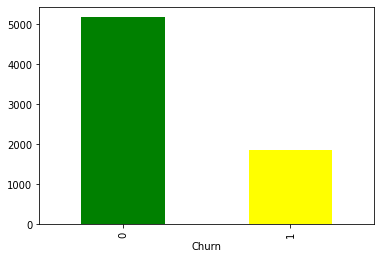

In [27]:
c=["green","yellow"]
visual.groupby("Churn")["Churn"].count().plot.bar(color=c)
plt.show()

In [28]:
visual["Churn"].mean()

0.2653698707936959

## Chrun rate is 26.5%

In [29]:
# Lets check all the ctaegorial variables except customerID and churn
v_dta=[i for i in cat_feat if i not in ["customerID","Churn"]]
v_dta

['PhoneService',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'gender',
 'Partner',
 'Dependents',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

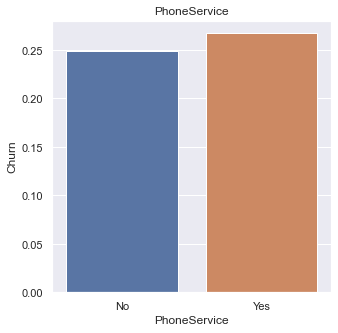

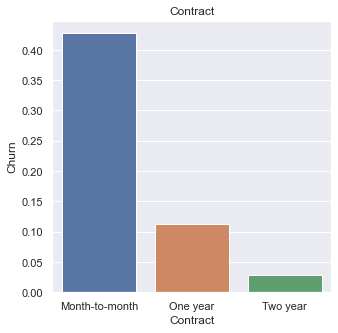

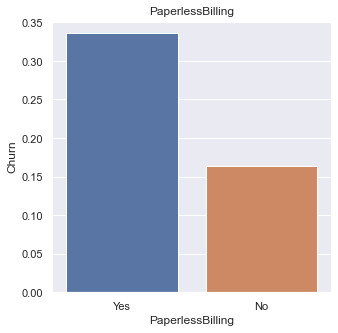

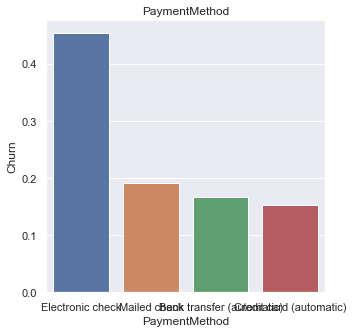

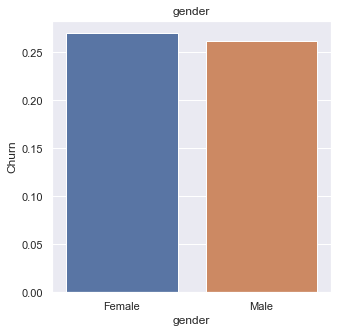

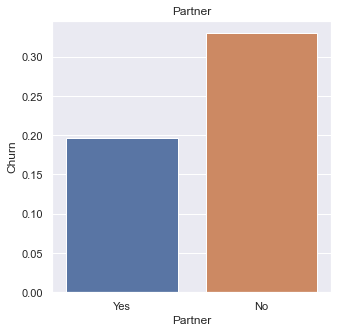

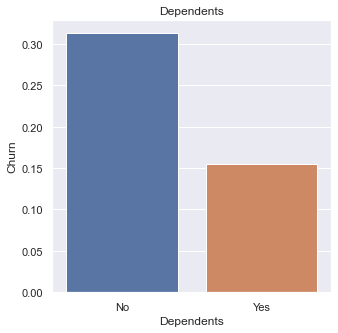

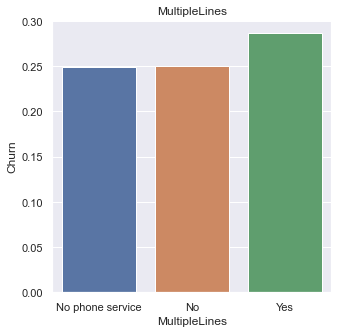

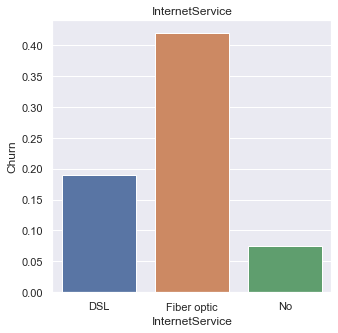

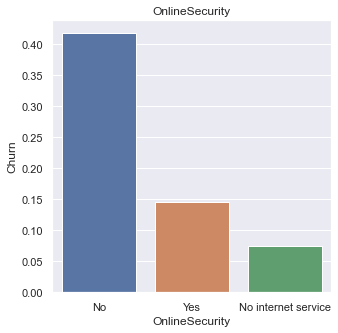

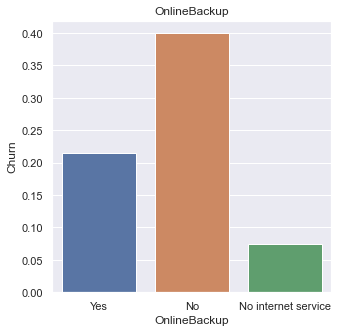

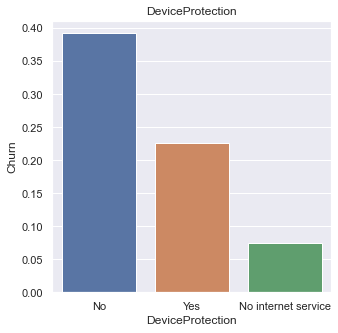

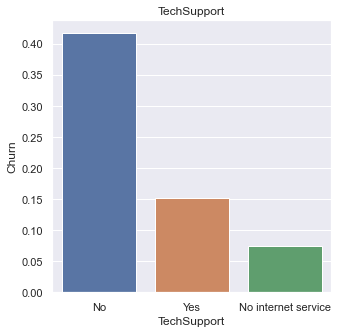

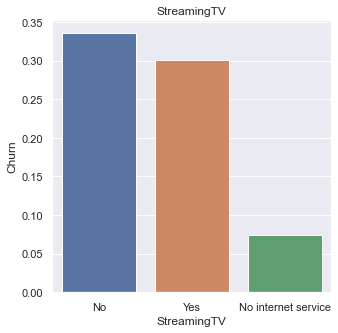

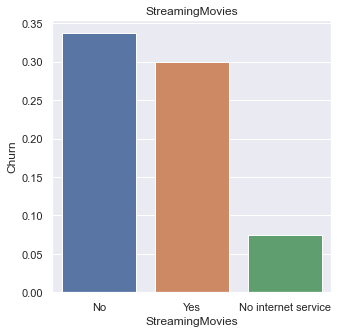

In [30]:
sns.set(rc={"figure.figsize":(5,5)})
for i in v_dta:
    sns.barplot(x=i,y="Churn",data=visual,ci=None)
    plt.xlabel(i)
    plt.ylabel("Churn")
    plt.title(i)
    plt.show()

# EDA

In [31]:
#lets have a look on categorial variables
for i in cat_feat:
    print("for feature {} the value is-- {}".format(i,df[i].unique()))

for feature customerID the value is-- ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
for feature PhoneService the value is-- ['No' 'Yes']
for feature Contract the value is-- ['Month-to-month' 'One year' 'Two year']
for feature PaperlessBilling the value is-- ['Yes' 'No']
for feature PaymentMethod the value is-- ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
for feature Churn the value is-- ['No' 'Yes']
for feature gender the value is-- ['Female' 'Male']
for feature Partner the value is-- ['Yes' 'No']
for feature Dependents the value is-- ['No' 'Yes']
for feature MultipleLines the value is-- ['No phone service' 'No' 'Yes']
for feature InternetService the value is-- ['DSL' 'Fiber optic' 'No']
for feature OnlineSecurity the value is-- ['No' 'Yes' 'No internet service']
for feature OnlineBackup the value is-- ['Yes' 'No' 'No internet service']
for feature DeviceProtection the value is-- ['No' 'Yes' 'No intern

In [32]:
# Here lot of variable are in yes - no form lets impute 1 and 0 in it
impute=["PhoneService","PaperlessBilling","Churn","Partner","Dependents"]
df1=df.copy()
for i in impute:
    df1[i]=np.where(df1[i]=="Yes",1,0)

In [33]:
df1[impute].head(2)

,PhoneService,PaperlessBilling,Churn,Partner,Dependents
0,0,1,0,1,0
1,1,0,0,0,0


# Alternatively lets create a function to do that

In [34]:
df2=df.copy()
def binary_map(x):
    return x.map({"Yes":1,"No":0})
df2[impute]=df2[impute].apply(binary_map)   

In [35]:
df2[impute].head(2)

,PhoneService,PaperlessBilling,Churn,Partner,Dependents
0,0,1,0,1,0
1,1,0,0,0,0


### Lets count unique features in categrial variables as well otherwise we have to pick up top 10 occuring features if there are so many categorial features

In [36]:
for i in cat_feat:
    print(i,len(df[i].unique()))

customerID 7043
PhoneService 2
Contract 3
PaperlessBilling 2
PaymentMethod 4
Churn 2
gender 2
Partner 2
Dependents 2
MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3


## Apply One hot encoding to create dummy variable

From data visulaization aove we came to know that "No internet service " have no such significane in variables ispo in dummy varibale we remove this value so we do it manually for variables

In [37]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df1[['Contract', 'PaymentMethod', 'gender', 'InternetService']], drop_first=True)

# Adding the results to the master dataframe
df1 = pd.concat([df1, dummy1], axis=1)

In [38]:
df1.head(2)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,0,0,0,1,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.50,0,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No,1,0,0,0,1,1,0,0


In [39]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(df1['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
#Adding the results to the master dataframe
df1 = pd.concat([df1,ml1], axis=1)

# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(df1['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)
# Adding the results to the master dataframe
df1 = pd.concat([df1,os1], axis=1)

# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(df1['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
# Adding the results to the master dataframe
df1 = pd.concat([df1,ob1], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'. 
dp = pd.get_dummies(df1['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
# Adding the results to the master dataframe
df1 = pd.concat([df1,dp1], axis=1)

# Creating dummy variables for the variable 'TechSupport'. 
ts = pd.get_dummies(df1['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
# Adding the results to the master dataframe
df1 = pd.concat([df1,ts1], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(df1['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
# Adding the results to the master dataframe
df1 = pd.concat([df1,st1], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'. 
sm = pd.get_dummies(df1['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)
# Adding the results to the master dataframe
df1 = pd.concat([df1,sm1], axis=1)

In [40]:
df1.shape

(7043, 43)

In [41]:
# Remove categorial variables as well
# We have created dummies for the below variables, so we can drop them
df1 = df1.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

In [42]:
# Remove customerID variables as well
df1.drop("customerID",axis=1,inplace=True)

In [43]:
df1.shape

(7043, 31)

In [44]:
df1.head(3)

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,34,1,0,56.95,1889.50,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,2,1,1,53.85,108.15,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0


In [45]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 7043 non-null   int64  
 1   PhoneService                           7043 non-null   int32  
 2   PaperlessBilling                       7043 non-null   int32  
 3   MonthlyCharges                         7043 non-null   float64
 4   TotalCharges                           7032 non-null   float64
 5   Churn                                  7043 non-null   int32  
 6   SeniorCitizen                          7043 non-null   int64  
 7   Partner                                7043 non-null   int32  
 8   Dependents                             7043 non-null   int32  
 9   Contract_One year                      7043 non-null   uint8  
 10  Contract_Two year                      7043 non-null   uint8  
 11  Paym

# Check for outliers

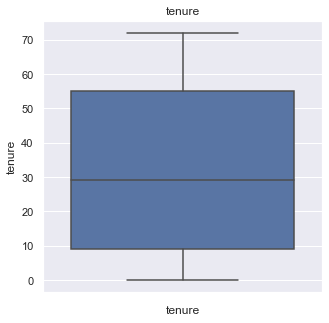

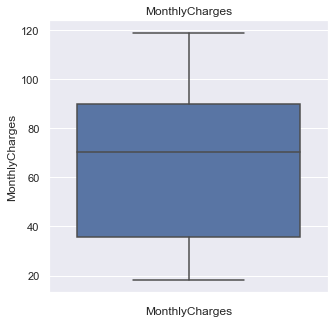

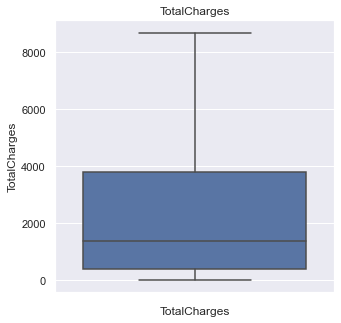

In [46]:
#sns.boxplot(["MonthlyCharges","TotalCharges"],data=df)
for i in cont_feat:
    sns.boxplot(y=df[i])
    plt.title(i)
    plt.xlabel(i)
    plt.show()

In [47]:
# Lets check via IQR meathod
# IQR=Q3-Q1
# min=Q1-1.5IQR
# max=Q3+1.5IQR
def cal_iqr(x):
    val=0
    q3=np.percentile(df[x],75)
    q1=np.percentile(df[x],25)
    IQR=q3-q1
    mini=q1-1.5*IQR
    maxi=q3+1.5*IQR
    for i in df[x]:
        if i >maxi or i< mini:
            val+=1
        else :
            val=0
    if val==1:
        print("outlierPrsent")
    else:
        print("Not_present")

In [48]:
#Check for outliers in all continous _features
for i in cont_feat:
    cal_iqr(i)

Not_present
Not_present
Not_present


# Another way to find outliers is-

In [49]:
out_chck=df1[cont_feat]

In [50]:
out_chck.describe(percentiles=[.10,.25,.5,.75,.90,.95,.99])

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
10%,2.000000,20.050000,84.600000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
90%,69.000000,102.600000,5976.640000
95%,72.000000,107.400000,6923.590000


See here there no rapid jump n the mn and max numbers for instance see tenure min is 0,10 percentile is 2 and max is 72 and 99 percntile is also 99

In [51]:
df1.isnull().mean()

tenure                                   0.000000
PhoneService                             0.000000
PaperlessBilling                         0.000000
MonthlyCharges                           0.000000
TotalCharges                             0.001562
Churn                                    0.000000
SeniorCitizen                            0.000000
Partner                                  0.000000
Dependents                               0.000000
Contract_One year                        0.000000
Contract_Two year                        0.000000
PaymentMethod_Credit card (automatic)    0.000000
PaymentMethod_Electronic check           0.000000
PaymentMethod_Mailed check               0.000000
gender_Male                              0.000000
InternetService_Fiber optic              0.000000
InternetService_No                       0.000000
MultipleLines_No                         0.000000
MultipleLines_Yes                        0.000000
OnlineSecurity_No                        0.000000


In [52]:
# since TotalCharges have null values around .01 prcent we can remove them as its very low
df1=df1[~df1["TotalCharges"].isnull()]

In [53]:
# Checking gain for null values
df1.isnull().sum()

tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
gender_Male                              0
InternetService_Fiber optic              0
InternetService_No                       0
MultipleLines_No                         0
MultipleLines_Yes                        0
OnlineSecurity_No                        0
OnlineSecurity_Yes                       0
OnlineBackup_No                          0
OnlineBackup_Yes                         0
DeviceProte

# Train-Test Split

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
# Putting feature in X
df2=df1.copy()
y=df2.pop("Churn")
X=df2

In [56]:
X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,34,1,0,56.95,1889.50,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,2,1,1,53.85,108.15,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,45,0,0,42.30,1840.75,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,2,1,1,70.70,151.65,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [57]:
y.head(2)

0    0
1    0
Name: Churn, dtype: int32

In [58]:
# splitting data into train-test split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

# Feature Scaling

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
num_feat

['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']

In [61]:
df1["SeniorCitizen"].value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

As SeniorCitizen comprise of only 0 nd 1 we wont apply scaling to it

In [62]:
scaler=StandardScaler()
X_train[['tenure', 'MonthlyCharges', 'TotalCharges']]=scaler.fit_transform(X_train[['tenure', 'MonthlyCharges', 'TotalCharges']])
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
879,0.019693,1,1,-0.338074,-0.276449,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0
5790,0.305384,0,1,-0.464443,-0.112702,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1
6498,-1.286319,1,1,0.581425,-0.974430,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0
880,-0.919003,1,1,1.505913,-0.550676,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1
2784,-1.163880,1,1,1.106854,-0.835971,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1


In [63]:
X_train.describe()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
count,4.922000e+03,4922.000000,4922.000000,4.922000e+03,4.922000e+03,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.00000,4922.000000,4922.000000,4922.00000
mean,1.229793e-16,0.903901,0.591223,-2.053980e-16,1.221426e-16,0.161926,0.480699,0.297237,0.214953,0.239130,0.218813,0.330557,0.232020,0.503657,0.439862,0.216985,0.482731,0.421170,0.497765,0.285250,0.431735,0.351280,0.440471,0.342544,0.485575,0.297440,0.40065,0.382365,0.395165,0.38785
std,1.000102e+00,0.294757,0.491658,1.000102e+00,1.000102e+00,0.368420,0.499678,0.457088,0.410832,0.426596,0.413484,0.470461,0.422164,0.500037,0.496421,0.412234,0.499752,0.493797,0.500046,0.451579,0.495368,0.477419,0.496494,0.474609,0.499843,0.457178,0.49008,0.486014,0.488936,0.48731
min,-1.286319e+00,0.000000,0.000000,-1.548555e+00,-1.002408e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
25%,-9.598159e-01,1.000000,0.000000,-9.665930e-01,-8.344722e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
50%,-1.435582e-01,1.000000,1.000000,1.823658e-01,-3.877341e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
75%,9.583897e-01,1.000000,1.000000,8.341630e-01,6.589888e-01,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000
max,1.611396e+00,1.000000,1.000000,1.793569e+00,2.818847e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000


# Corelation

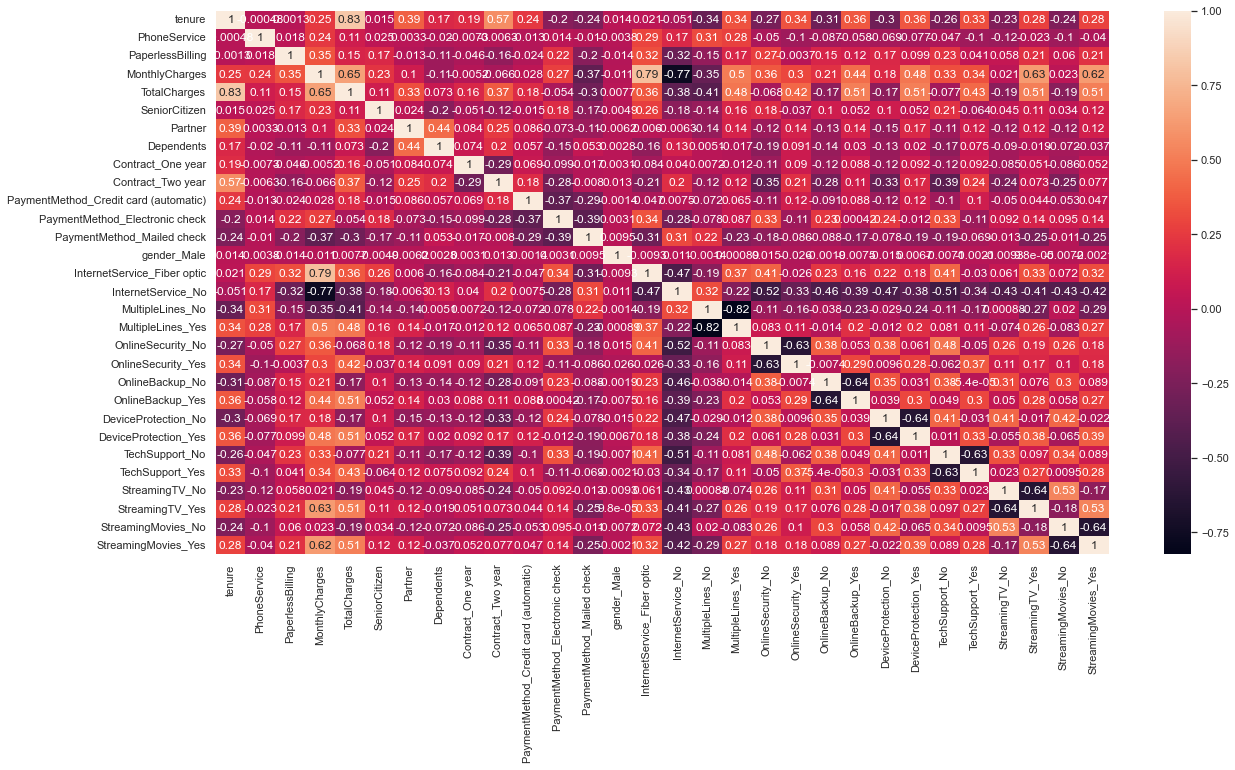

In [64]:
# check for corealtion as well between the variables
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

In [65]:
X_train.corr()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
tenure,1.000000,-0.000485,-0.001279,0.251741,0.827856,0.014936,0.394238,0.172172,0.192235,0.569399,0.239842,-0.203907,-0.242026,0.014000,0.020675,-0.051170,-0.335734,0.339493,-0.267564,0.342992,-0.307184,0.362917,-0.298424,0.356631,-0.256157,0.326202,-0.231101,0.276437,-0.236646,0.280722
PhoneService,-0.000485,1.000000,0.017736,0.242961,0.109057,0.025433,0.003271,-0.020221,-0.007261,-0.006289,-0.012507,0.013706,-0.010214,-0.003819,0.288942,0.171644,0.314988,0.278133,-0.050402,-0.100878,-0.087386,-0.057538,-0.068952,-0.076954,-0.047341,-0.103012,-0.121673,-0.022897,-0.104466,-0.040386
PaperlessBilling,-0.001279,0.017736,1.000000,0.350308,0.151208,0.172537,-0.013097,-0.107568,-0.045789,-0.159738,-0.023738,0.215312,-0.199898,-0.013756,0.324714,-0.322271,-0.153620,0.166060,0.269048,-0.003732,0.153232,0.119277,0.173344,0.098579,0.228204,0.041089,0.058283,0.214577,0.060079,0.212342
MonthlyCharges,0.251741,0.242961,0.350308,1.000000,0.652358,0.227843,0.100380,-0.108461,-0.005162,-0.065552,0.028261,0.272938,-0.373761,-0.010763,0.787226,-0.766155,-0.346161,0.495364,0.362434,0.298069,0.212101,0.441472,0.180263,0.476889,0.325029,0.335475,0.021063,0.628609,0.023170,0.624873
TotalCharges,0.827856,0.109057,0.151208,0.652358,1.000000,0.106341,0.329664,0.073416,0.159820,0.367333,0.184153,-0.054075,-0.299000,0.007738,0.361861,-0.380787,-0.408706,0.478734,-0.067817,0.422705,-0.173825,0.509157,-0.173699,0.512452,-0.076816,0.427337,-0.187482,0.512032,-0.191325,0.514086
SeniorCitizen,0.014936,0.025433,0.172537,0.227843,0.106341,1.000000,0.024156,-0.200191,-0.051445,-0.121005,-0.015200,0.181191,-0.169745,-0.004870,0.263809,-0.183223,-0.139878,0.156746,0.184519,-0.037063,0.102335,0.052024,0.102144,0.052289,0.209660,-0.064015,0.044661,0.110374,0.033904,0.120978
Partner,0.394238,0.003271,-0.013097,0.100380,0.329664,0.024156,1.000000,0.436622,0.083568,0.245211,0.085852,-0.072696,-0.112669,-0.006224,0.005970,-0.006300,-0.140083,0.143725,-0.116880,0.135176,-0.132575,0.142999,-0.154939,0.167556,-0.106479,0.122097,-0.115295,0.121604,-0.117246,0.122967
Dependents,0.172172,-0.020221,-0.107568,-0.108461,0.073416,-0.200191,0.436622,1.000000,0.074152,0.199209,0.056852,-0.147988,0.053239,0.002800,-0.162561,0.128931,0.005129,-0.017261,-0.188688,0.091242,-0.136081,0.029871,-0.126623,0.020475,-0.174681,0.074727,-0.089945,-0.018661,-0.071947,-0.036880
Contract_One year,0.192235,-0.007261,-0.045789,-0.005162,0.159820,-0.051445,0.083568,0.074152,1.000000,-0.293350,0.068779,-0.098545,-0.016962,0.003097,-0.084070,0.040112,0.007197,-0.011618,-0.114384,0.090043,-0.118599,0.088423,-0.121561,0.092326,-0.117501,0.092297,-0.084667,0.051353,-0.086075,0.052430
Contract_Two year,0.569399,-0.006289,-0.159738,-0.065552,0.367333,-0.121005,0.245211,0.199209,-0.293350,1.000000,0.184854,-0.282561,-0.007997,0.012571,-0.207957,0.200612,-0.117407,0.115069,-0.353298,0.208083,-0.277092,0.114288,-0.330463,0.171454,-0.386466,0.241640,-0.241604,0.073467,-0.245621,0.076735


In [66]:
df1.columns[1]

'PhoneService'

In [67]:
# Lets write a functin for corealtion
def check_corr(dataset,thres):
    cols=set()
    corr_val=dataset.corr()
    for i in range(len(dataset.columns)):
        for j in range(i):
            if abs(corr_val.iloc[i,j])>thres:
                nwcol=corr_val.columns[i]
                cols.add(nwcol)
    return cols

In [68]:
check_corr(X_train,.7)

{'InternetService_Fiber optic',
 'InternetService_No',
 'MultipleLines_Yes',
 'TotalCharges'}

### Dropping highly correlated dummy variables

In [69]:
X_train.drop(['InternetService_Fiber optic','InternetService_No','MultipleLines_Yes'],axis=1,inplace=True)
X_test.drop(['InternetService_Fiber optic','InternetService_No','MultipleLines_Yes'],axis=1,inplace=True)

# Step 7: Model Building
#### Let's start by splitting our data into a training set and a test set.

In [70]:
import statsmodels.api as sm

# logistic Model

    * If your outcome is continuous and unbounded, then the most "default" choice is the Gaussian distribution (a.k.a. normal distribution), i.e. the standard linear regression (unless you use other link function then the default identity link).

    * If you are dealing with continuous non-negative outcome, then you could consider the Gamma distribution, or Inverse Gaussian distribution.

    * If your outcome is discrete, or more precisely, you are dealing with counts (how many times something happen in given time interval), then the most common choice of the distribution to start with is Poisson distribution. The problem with Poisson distribution is that it is rather inflexible in the fact that it assumes that mean is equal to variance, if this assumption is not met, you may consider using quasi-Poisson family, or negative binomial distribution (see also Definition of dispersion parameter for quasipoisson family).

    * If your outcome is binary (zeros and ones), proportions of "successes" and "failures" (values between 0 and 1), or their counts, you can use Binomial distribution, i.e. the logistic regression model. If there is more then two categories, you would use multinomial distribution in multinomial regression.

In [71]:
# Add constatnt as it is an stats model
X_train_sm=sm.add_constant(X_train)
# fit the model
logml=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
logml.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4899
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2008.1
Date:                Mon, 04 Oct 2021   Deviance:                       4016.2
Time:                        16:58:42   Pearson chi2:                 6.13e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.2776      0.418     -0.664      0.507      -1.097       0.542
tenure                                   -1.5016      0.188     -7.972      0.000      -1.871      -1.132
PhoneService                             -0.9548      0.241     -3.961      0.000      -1.427      -0.482
PaperlessBilling                          0.3338      0.090      3.711      0.000       0.157       0.510
MonthlyCharges                            0.8131      0.142      5.737      0.000       0.535       1.091
TotalCharges                              0.7172      0.197      3.641      0.000       0.331       1.103
SeniorCitizen                             0.3934      0.101      3.879      0.000       0.195       0.592
Partner                                   0.0466      0.093      0.498      0.619      -0.137       0.230
Dependents                               -0.1505      0.107     -1.406      0.160      -0.360       0.059
Contract_One year                        -0.6706      0.129     -5.209      0.000      -0.923      -0.418
Contract_Two year                        -1.2481      0.212     -5.885      0.000      -1.664      -0.832
PaymentMethod_Credit card (automatic)    -0.2573      0.137     -1.882      0.060      -0.525       0.011
PaymentMethod_Electronic check            0.1638      0.113      1.455      0.146      -0.057       0.384
PaymentMethod_Mailed check               -0.2541      0.137     -1.850      0.064      -0.523       0.015
gender_Male                              -0.0365      0.078     -0.466      0.641      -0.190       0.117
MultipleLines_No                         -0.0714      0.100     -0.712      0.477      -0.268       0.125
OnlineSecurity_No                         0.1669      0.064      2.601      0.009       0.041       0.293
OnlineSecurity_Yes                       -0.3534      0.078     -4.529      0.000      -0.506      -0.200
OnlineBackup_No                           0.0665      0.059      1.124      0.261      -0.049       0.182
OnlineBackup_Yes                         -0.2530      0.077     -3.299      0.001      -0.403      -0.103
DeviceProtection_No                      -0.0053      0.060     -0.088      0.930      -0.122       0.112
DeviceProtection_Yes                     -0.1812      0.078     -2.316      0.021      -0.335      -0.028
TechSupport_No                            0.1712      0.066      2.583      0.010       0.041       0.301
TechSupport_Yes                          -0.3577      0.075     -4.755      0.000      -0.505      -0.210
StreamingTV_No                           -0.0782      0.055     -1.412      0.158      -0.187       0.030
StreamingTV_Yes                          -0.1083      0.088     -1.229      0.219      -0.281       0.064
Streaming

# Feature Selection Using RFE


In [72]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [73]:
from sklearn.feature_selection import RFE
rfe=RFE(logreg,20)
rfe = rfe.fit(X_train,y_train)
rfe.support_

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True, False,
        True, False,  True,  True,  True, False, False, False,  True])

In [74]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', True, 1),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 5),
 ('Dependents', True, 1),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', True, 1),
 ('PaymentMethod_Electronic check', True, 1),
 ('PaymentMethod_Mailed check', True, 1),
 ('gender_Male', False, 6),
 ('MultipleLines_No', True, 1),
 ('OnlineSecurity_No', True, 1),
 ('OnlineSecurity_Yes', True, 1),
 ('OnlineBackup_No', False, 4),
 ('OnlineBackup_Yes', True, 1),
 ('DeviceProtection_No', False, 8),
 ('DeviceProtection_Yes', True, 1),
 ('TechSupport_No', True, 1),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_No', False, 3),
 ('StreamingTV_Yes', False, 2),
 ('StreamingMovies_No', False, 7),
 ('StreamingMovies_Yes', True, 1)]

In [75]:
cols=X_train.columns[rfe.support_]

In [76]:
# Columns dropped
X_train.columns[~rfe.support_]

Index(['Partner', 'gender_Male', 'OnlineBackup_No', 'DeviceProtection_No',
       'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_No'],
      dtype='object')

# Assessing the model with StatsModels

In [77]:
# Add constant
X_train_sm=sm.add_constant(X_train[cols])
# fit the model
logml=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()
logml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4902
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2008.3
Date:                Mon, 04 Oct 2021   Deviance:                       4016.7
Time:                        16:58:46   Pearson chi2:                 6.11e+03
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.3184      0.380     -0.838      0.402      -1.063       0.427
tenure                                   -1.4925      0.188     -7.960      0.000      -1.860      -1.125
PhoneService                             -0.9344      0.224     -4.164      0.000      -1.374      -0.495
PaperlessBilling                          0.3340      0.090      3.714      0.000       0.158       0.510
MonthlyCharges                            0.7986      0.128      6.262      0.000       0.549       1.049
TotalCharges                              0.7137      0.197      3.627      0.000       0.328       1.099
SeniorCitizen                             0.3997      0.101      3.963      0.000       0.202       0.597
Dependents                               -0.1301      0.098     -1.321      0.186      -0.323       0.063
Contract_One year                        -0.6740      0.128     -5.255      0.000      -0.925      -0.423
Contract_Two year                        -1.2525      0.212     -5.911      0.000      -1.668      -0.837
PaymentMethod_Credit card (automatic)    -0.2593      0.137     -1.899      0.058      -0.527       0.008
PaymentMethod_Electronic check            0.1621      0.112      1.441      0.150      -0.058       0.383
PaymentMethod_Mailed check               -0.2594      0.137     -1.892      0.058      -0.528       0.009
MultipleLines_No                         -0.0745      0.099     -0.749      0.454      -0.269       0.120
OnlineSecurity_No                         0.1533      0.118      1.300      0.194      -0.078       0.384
OnlineSecurity_Yes                       -0.3639      0.134     -2.721      0.007      -0.626      -0.102
OnlineBackup_Yes                         -0.3171      0.094     -3.387      0.001      -0.501      -0.134
DeviceProtection_Yes                     -0.1735      0.097     -1.786      0.074      -0.364       0.017
TechSupport_No                            0.1595      0.118      1.356      0.175      -0.071       0.390
TechSupport_Yes                          -0.3701      0.134     -2.770      0.006      -0.632      -0.108
StreamingMovies_Yes                      -0.1414      0.108     -1.308      0.191      -0.353       0.070
=========================================================================================================
"""

# VIF

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [79]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

def vif_chck(x):
    vif=pd.DataFrame()
    vif["Features"]=x.columns
    vif["VIF"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
    vif["VIF"]=round(vif["VIF"],2)
    vif=vif.sort_values(by="VIF",ascending=False)
    return vif

In [80]:
x=X_train[cols]
vif_chck(x)

,Features,VIF
18,TechSupport_Yes,inf
17,TechSupport_No,inf
14,OnlineSecurity_Yes,inf
13,OnlineSecurity_No,inf
4,TotalCharges,10.83
1,PhoneService,7.90
0,tenure,7.50
3,MonthlyCharges,5.31
8,Contract_Two year,3.39
12,MultipleLines_No,2.99


In [81]:
# remove TechSupport_No
x.drop("TechSupport_No",axis=1,inplace=True)

In [82]:
# Add constant
X_train_sm=sm.add_constant(x)
# fit the model
logml=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()
logml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4902
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2008.3
Date:                Mon, 04 Oct 2021   Deviance:                       4016.7
Time:                        16:58:47   Pearson chi2:                 6.11e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.3184      0.380     -0.838      0.402      -1.063       0.427
tenure                                   -1.4925      0.188     -7.960      0.000      -1.860      -1.125
PhoneService                             -0.9344      0.224     -4.164      0.000      -1.374      -0.495
PaperlessBilling                          0.3340      0.090      3.714      0.000       0.158       0.510
MonthlyCharges                            0.7986      0.128      6.262      0.000       0.549       1.049
TotalCharges                              0.7137      0.197      3.627      0.000       0.328       1.099
SeniorCitizen                             0.3997      0.101      3.963      0.000       0.202       0.597
Dependents                               -0.1301      0.098     -1.321      0.186      -0.323       0.063
Contract_One year                        -0.6740      0.128     -5.255      0.000      -0.925      -0.423
Contract_Two year                        -1.2525      0.212     -5.911      0.000      -1.668      -0.837
PaymentMethod_Credit card (automatic)    -0.2593      0.137     -1.899      0.058      -0.527       0.008
PaymentMethod_Electronic check            0.1621      0.112      1.441      0.150      -0.058       0.383
PaymentMethod_Mailed check               -0.2594      0.137     -1.892      0.058      -0.528       0.009
MultipleLines_No                         -0.0745      0.099     -0.749      0.454      -0.269       0.120
OnlineSecurity_No                         0.3128      0.224      1.399      0.162      -0.125       0.751
OnlineSecurity_Yes                       -0.2044      0.242     -0.845      0.398      -0.679       0.270
OnlineBackup_Yes                         -0.3171      0.094     -3.387      0.001      -0.501      -0.134
DeviceProtection_Yes                     -0.1735      0.097     -1.786      0.074      -0.364       0.017
TechSupport_Yes                          -0.5296      0.101     -5.239      0.000      -0.728      -0.332
StreamingMovies_Yes                      -0.1414      0.108     -1.308      0.191      -0.353       0.070
=========================================================================================================
"""

In [83]:
vif_chck(x)

,Features,VIF
4,TotalCharges,10.83
1,PhoneService,7.90
0,tenure,7.50
13,OnlineSecurity_No,5.66
3,MonthlyCharges,5.31
14,OnlineSecurity_Yes,3.70
8,Contract_Two year,3.39
12,MultipleLines_No,2.99
2,PaperlessBilling,2.87
10,PaymentMethod_Electronic check,2.78


In [84]:
# drop OnlineSecurity_No
x.drop("OnlineSecurity_No",axis=1,inplace=True)
# Add constant
X_train_sm=sm.add_constant(x)
# fit the model
logml=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()
logml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4903
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2009.3
Date:                Mon, 04 Oct 2021   Deviance:                       4018.7
Time:                        16:58:48   Pearson chi2:                 6.02e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.1127      0.224      0.503      0.615      -0.327       0.552
tenure                                   -1.4616      0.184     -7.925      0.000      -1.823      -1.100
PhoneService                             -1.1104      0.186     -5.955      0.000      -1.476      -0.745
PaperlessBilling                          0.3367      0.090      3.744      0.000       0.160       0.513
MonthlyCharges                            0.9246      0.090     10.219      0.000       0.747       1.102
TotalCharges                              0.6638      0.192      3.462      0.001       0.288       1.040
SeniorCitizen                             0.3986      0.101      3.946      0.000       0.201       0.597
Dependents                               -0.1310      0.098     -1.331      0.183      -0.324       0.062
Contract_One year                        -0.6835      0.128     -5.342      0.000      -0.934      -0.433
Contract_Two year                        -1.2676      0.211     -6.005      0.000      -1.681      -0.854
PaymentMethod_Credit card (automatic)    -0.2588      0.137     -1.894      0.058      -0.527       0.009
PaymentMethod_Electronic check            0.1629      0.113      1.447      0.148      -0.058       0.384
PaymentMethod_Mailed check               -0.2635      0.137     -1.924      0.054      -0.532       0.005
MultipleLines_No                         -0.0542      0.099     -0.549      0.583      -0.247       0.139
OnlineSecurity_Yes                       -0.5116      0.102     -4.996      0.000      -0.712      -0.311
OnlineBackup_Yes                         -0.3225      0.094     -3.432      0.001      -0.507      -0.138
DeviceProtection_Yes                     -0.1876      0.097     -1.934      0.053      -0.378       0.003
TechSupport_Yes                          -0.5249      0.101     -5.172      0.000      -0.724      -0.326
StreamingMovies_Yes                      -0.1854      0.104     -1.786      0.074      -0.389       0.018
=========================================================================================================
"""

In [85]:
vif_chck(x)

,Features,VIF
4,TotalCharges,10.43
0,tenure,7.50
1,PhoneService,7.49
3,MonthlyCharges,4.86
8,Contract_Two year,3.39
12,MultipleLines_No,2.99
17,StreamingMovies_Yes,2.68
2,PaperlessBilling,2.66
10,PaymentMethod_Electronic check,2.53
11,PaymentMethod_Mailed check,2.29


In [86]:
# drop MultipleLines_No
x.drop("MultipleLines_No",axis=1,inplace=True)
# Add constant
X_train_sm=sm.add_constant(x)
# fit the model
logml=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()
logml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4904
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2009.5
Date:                Mon, 04 Oct 2021   Deviance:                       4019.0
Time:                        16:58:48   Pearson chi2:                 6.03e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.1362      0.220      0.619      0.536      -0.295       0.567
tenure                                   -1.4591      0.184     -7.911      0.000      -1.821      -1.098
PhoneService                             -1.1594      0.164     -7.070      0.000      -1.481      -0.838
PaperlessBilling                          0.3375      0.090      3.753      0.000       0.161       0.514
MonthlyCharges                            0.9373      0.088     10.706      0.000       0.766       1.109
TotalCharges                              0.6719      0.191      3.513      0.000       0.297       1.047
SeniorCitizen                             0.4008      0.101      3.973      0.000       0.203       0.599
Dependents                               -0.1308      0.098     -1.329      0.184      -0.324       0.062
Contract_One year                        -0.6869      0.128     -5.374      0.000      -0.937      -0.436
Contract_Two year                        -1.2691      0.211     -6.010      0.000      -1.683      -0.855
PaymentMethod_Credit card (automatic)    -0.2580      0.137     -1.889      0.059      -0.526       0.010
PaymentMethod_Electronic check            0.1627      0.113      1.445      0.148      -0.058       0.383
PaymentMethod_Mailed check               -0.2634      0.137     -1.923      0.054      -0.532       0.005
OnlineSecurity_Yes                       -0.5149      0.102     -5.039      0.000      -0.715      -0.315
OnlineBackup_Yes                         -0.3254      0.094     -3.470      0.001      -0.509      -0.142
DeviceProtection_Yes                     -0.1917      0.097     -1.982      0.047      -0.381      -0.002
TechSupport_Yes                          -0.5288      0.101     -5.225      0.000      -0.727      -0.330
StreamingMovies_Yes                      -0.1905      0.103     -1.843      0.065      -0.393       0.012
=========================================================================================================
"""

In [87]:
vif_chck(x)

,Features,VIF
4,TotalCharges,10.40
0,tenure,7.45
1,PhoneService,5.45
3,MonthlyCharges,4.69
8,Contract_Two year,3.38
16,StreamingMovies_Yes,2.68
2,PaperlessBilling,2.65
10,PaymentMethod_Electronic check,2.52
11,PaymentMethod_Mailed check,2.29
14,DeviceProtection_Yes,2.18


In [88]:
# drop Dependents
x.drop("Dependents",axis=1,inplace=True)
# Add constant
X_train_sm=sm.add_constant(x)
# fit the model
logml=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()
logml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4905
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2010.4
Date:                Mon, 04 Oct 2021   Deviance:                       4020.7
Time:                        16:58:49   Pearson chi2:                 6.09e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.1057      0.219      0.483      0.629      -0.323       0.534
tenure                                   -1.4749      0.184     -7.999      0.000      -1.836      -1.114
PhoneService                             -1.1634      0.164     -7.101      0.000      -1.485      -0.842
PaperlessBilling                          0.3391      0.090      3.772      0.000       0.163       0.515
MonthlyCharges                            0.9408      0.087     10.753      0.000       0.769       1.112
TotalCharges                              0.6825      0.191      3.567      0.000       0.307       1.058
SeniorCitizen                             0.4212      0.100      4.220      0.000       0.226       0.617
Contract_One year                        -0.6972      0.128     -5.468      0.000      -0.947      -0.447
Contract_Two year                        -1.2839      0.211     -6.091      0.000      -1.697      -0.871
PaymentMethod_Credit card (automatic)    -0.2579      0.137     -1.888      0.059      -0.526       0.010
PaymentMethod_Electronic check            0.1643      0.113      1.460      0.144      -0.056       0.385
PaymentMethod_Mailed check               -0.2640      0.137     -1.928      0.054      -0.532       0.004
OnlineSecurity_Yes                       -0.5195      0.102     -5.087      0.000      -0.720      -0.319
OnlineBackup_Yes                         -0.3283      0.094     -3.503      0.000      -0.512      -0.145
DeviceProtection_Yes                     -0.1922      0.097     -1.988      0.047      -0.382      -0.003
TechSupport_Yes                          -0.5317      0.101     -5.255      0.000      -0.730      -0.333
StreamingMovies_Yes                      -0.1916      0.103     -1.854      0.064      -0.394       0.011
=========================================================================================================
"""

In [89]:
vif_chck(x)

,Features,VIF
4,TotalCharges,10.39
0,tenure,7.43
1,PhoneService,5.32
3,MonthlyCharges,4.65
7,Contract_Two year,3.35
15,StreamingMovies_Yes,2.67
2,PaperlessBilling,2.65
9,PaymentMethod_Electronic check,2.52
10,PaymentMethod_Mailed check,2.29
13,DeviceProtection_Yes,2.17


In [90]:
# drop PaymentMethod_Electronic check
x.drop("PaymentMethod_Electronic check",axis=1,inplace=True)
# Add constant
X_train_sm=sm.add_constant(x)
# fit the model
logml=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()
logml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2011.4
Date:                Mon, 04 Oct 2021   Deviance:                       4022.9
Time:                        16:58:49   Pearson chi2:                 6.15e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.2343      0.200      1.172      0.241      -0.158       0.626
tenure                                   -1.4938      0.184     -8.114      0.000      -1.855      -1.133
PhoneService                             -1.1827      0.163     -7.244      0.000      -1.503      -0.863
PaperlessBilling                          0.3447      0.090      3.841      0.000       0.169       0.521
MonthlyCharges                            0.9510      0.087     10.909      0.000       0.780       1.122
TotalCharges                              0.6900      0.191      3.604      0.000       0.315       1.065
SeniorCitizen                             0.4263      0.100      4.277      0.000       0.231       0.622
Contract_One year                        -0.7067      0.127     -5.549      0.000      -0.956      -0.457
Contract_Two year                        -1.3000      0.211     -6.174      0.000      -1.713      -0.887
PaymentMethod_Credit card (automatic)    -0.3702      0.113     -3.285      0.001      -0.591      -0.149
PaymentMethod_Mailed check               -0.3799      0.111     -3.413      0.001      -0.598      -0.162
OnlineSecurity_Yes                       -0.5288      0.102     -5.189      0.000      -0.729      -0.329
OnlineBackup_Yes                         -0.3308      0.094     -3.532      0.000      -0.514      -0.147
DeviceProtection_Yes                     -0.1988      0.097     -2.059      0.039      -0.388      -0.010
TechSupport_Yes                          -0.5386      0.101     -5.330      0.000      -0.737      -0.341
StreamingMovies_Yes                      -0.1901      0.103     -1.842      0.065      -0.392       0.012
=========================================================================================================
"""

In [91]:
vif_chck(x)

,Features,VIF
4,TotalCharges,10.32
0,tenure,7.41
3,MonthlyCharges,4.65
1,PhoneService,4.46
7,Contract_Two year,3.35
14,StreamingMovies_Yes,2.59
2,PaperlessBilling,2.57
12,DeviceProtection_Yes,2.16
11,OnlineBackup_Yes,2.04
6,Contract_One year,2.01


In [92]:
# drop StreamingMovies_Yes
x.drop("StreamingMovies_Yes",axis=1,inplace=True)
# Add constant
X_train_sm=sm.add_constant(x)
# fit the model
logml=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()
logml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2013.1
Date:                Mon, 04 Oct 2021   Deviance:                       4026.3
Time:                        16:58:49   Pearson chi2:                 6.10e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.0825      0.182      0.453      0.651      -0.275       0.440
tenure                                   -1.4729      0.183     -8.049      0.000      -1.832      -1.114
PhoneService                             -1.0939      0.156     -7.021      0.000      -1.399      -0.789
PaperlessBilling                          0.3460      0.090      3.857      0.000       0.170       0.522
MonthlyCharges                            0.8872      0.080     11.134      0.000       0.731       1.043
TotalCharges                              0.6558      0.190      3.454      0.001       0.284       1.028
SeniorCitizen                             0.4320      0.100      4.335      0.000       0.237       0.627
Contract_One year                        -0.7308      0.127     -5.771      0.000      -0.979      -0.483
Contract_Two year                        -1.3263      0.210     -6.318      0.000      -1.738      -0.915
PaymentMethod_Credit card (automatic)    -0.3698      0.113     -3.280      0.001      -0.591      -0.149
PaymentMethod_Mailed check               -0.3820      0.111     -3.439      0.001      -0.600      -0.164
OnlineSecurity_Yes                       -0.5087      0.101     -5.019      0.000      -0.707      -0.310
OnlineBackup_Yes                         -0.3117      0.093     -3.345      0.001      -0.494      -0.129
DeviceProtection_Yes                     -0.1960      0.097     -2.029      0.042      -0.385      -0.007
TechSupport_Yes                          -0.5401      0.101     -5.336      0.000      -0.738      -0.342
=========================================================================================================
"""

In [93]:
vif_chck(x)

,Features,VIF
4,TotalCharges,10.31
0,tenure,7.38
1,PhoneService,4.41
3,MonthlyCharges,4.30
7,Contract_Two year,3.25
2,PaperlessBilling,2.49
12,DeviceProtection_Yes,2.12
11,OnlineBackup_Yes,2.04
6,Contract_One year,1.96
13,TechSupport_Yes,1.96


In [94]:
# drop TotalCharges
x.drop("TotalCharges",axis=1,inplace=True)
# Add constant
X_train_sm=sm.add_constant(x)
# fit the model
logml=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()
logml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2019.3
Date:                Mon, 04 Oct 2021   Deviance:                       4038.6
Time:                        16:58:50   Pearson chi2:                 5.30e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.0830      0.180      0.462      0.644      -0.269       0.435
tenure                                   -0.8950      0.065    -13.667      0.000      -1.023      -0.767
PhoneService                             -1.0318      0.152     -6.802      0.000      -1.329      -0.734
PaperlessBilling                          0.3349      0.089      3.742      0.000       0.159       0.510
MonthlyCharges                            1.0425      0.067     15.528      0.000       0.911       1.174
SeniorCitizen                             0.4424      0.100      4.427      0.000       0.247       0.638
Contract_One year                        -0.7224      0.126     -5.745      0.000      -0.969      -0.476
Contract_Two year                        -1.2871      0.207     -6.206      0.000      -1.694      -0.881
PaymentMethod_Credit card (automatic)    -0.3751      0.113     -3.325      0.001      -0.596      -0.154
PaymentMethod_Mailed check               -0.3307      0.110     -3.015      0.003      -0.546      -0.116
OnlineSecurity_Yes                       -0.5070      0.101     -5.012      0.000      -0.705      -0.309
OnlineBackup_Yes                         -0.2894      0.093     -3.121      0.002      -0.471      -0.108
DeviceProtection_Yes                     -0.1779      0.096     -1.846      0.065      -0.367       0.011
TechSupport_Yes                          -0.5347      0.101     -5.292      0.000      -0.733      -0.337
=========================================================================================================
"""

In [95]:
vif_chck(x)

,Features,VIF
1,PhoneService,4.37
6,Contract_Two year,3.24
2,PaperlessBilling,2.48
0,tenure,2.35
11,DeviceProtection_Yes,2.11
3,MonthlyCharges,2.07
10,OnlineBackup_Yes,2.02
5,Contract_One year,1.95
12,TechSupport_Yes,1.95
9,OnlineSecurity_Yes,1.79


In [96]:
# drop DeviceProtection_Yes
x.drop("DeviceProtection_Yes",axis=1,inplace=True)
# Add constant
X_train_sm=sm.add_constant(x)
# fit the model
logml=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()
logml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4909
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2021.0
Date:                Mon, 04 Oct 2021   Deviance:                       4042.0
Time:                        16:58:50   Pearson chi2:                 5.32e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.0130      0.172     -0.076      0.940      -0.350       0.324
tenure                                   -0.9084      0.065    -13.942      0.000      -1.036      -0.781
PhoneService                             -0.9823      0.149     -6.587      0.000      -1.275      -0.690
PaperlessBilling                          0.3419      0.089      3.827      0.000       0.167       0.517
MonthlyCharges                            1.0029      0.063     15.799      0.000       0.879       1.127
SeniorCitizen                             0.4459      0.100      4.464      0.000       0.250       0.642
Contract_One year                        -0.7471      0.125     -5.972      0.000      -0.992      -0.502
Contract_Two year                        -1.3195      0.207     -6.383      0.000      -1.725      -0.914
PaymentMethod_Credit card (automatic)    -0.3844      0.113     -3.411      0.001      -0.605      -0.164
PaymentMethod_Mailed check               -0.3406      0.109     -3.111      0.002      -0.555      -0.126
OnlineSecurity_Yes                       -0.5012      0.101     -4.957      0.000      -0.699      -0.303
OnlineBackup_Yes                         -0.2849      0.093     -3.074      0.002      -0.467      -0.103
TechSupport_Yes                          -0.5436      0.101     -5.385      0.000      -0.742      -0.346
=========================================================================================================
"""

In [97]:
vif_chck(x)

,Features,VIF
1,PhoneService,4.35
6,Contract_Two year,3.15
2,PaperlessBilling,2.46
0,tenure,2.35
10,OnlineBackup_Yes,2.01
11,TechSupport_Yes,1.92
5,Contract_One year,1.91
3,MonthlyCharges,1.87
9,OnlineSecurity_Yes,1.78
8,PaymentMethod_Mailed check,1.77


In [98]:
# Getting the predicted values on the train set
y_train_pred=logml.predict(X_train_sm)
y_train_pred[:10]

879     0.214960
5790    0.331990
6498    0.692814
880     0.589529
2784    0.725186
3874    0.381283
5387    0.344377
6623    0.793968
4465    0.298516
5364    0.589935
dtype: float64

#### Here
    * 879 (Index)    0.214960(Prob. of churn)

#### Creating a dataframe with the actual churn flag and the predicted probabilities

In [99]:
y_train_pred_final=pd.DataFrame({"Churn":y_train.values,"Churn_Prob":y_train_pred})
y_train_pred_final["Cust_ID"]=y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,Cust_ID
879,0,0.214960,879
5790,0,0.331990,5790
6498,1,0.692814,6498
880,1,0.589529,880
2784,1,0.725186,2784


#### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [100]:
y_train_pred_final["Predicted"]=np.where(y_train_pred_final["Churn_Prob"]>0.5,1,0)
y_train_pred_final.head()

,Churn,Churn_Prob,Cust_ID,Predicted
879,0,0.214960,879,0
5790,0,0.331990,5790,0
6498,1,0.692814,6498,1
880,1,0.589529,880,1
2784,1,0.725186,2784,1


# Confusion Matrix

In [101]:
from sklearn import metrics

In [102]:
# confusion metrics
confusion=metrics.confusion_matrix(y_train_pred_final["Churn"],y_train_pred_final["Predicted"])
print(confusion)

[[3274  361]
 [ 590  697]]


In [103]:
# Predicted     not_churn    churn
# Actual
# not_churn        3274      361
# churn            590       697  

In [104]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Churn"],y_train_pred_final["Predicted"]))

0.8067858594067452


# Check for precision and recall since it consist of imbalace data


In [105]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [106]:
Precision=TP/(TP+FP)
Precision

0.6587901701323251

65% of yes i.e churn predicted is actually a churn

In [107]:
Recall=TP/(TP+FN)
Recall

0.5415695415695416

54.1% of churn is right among all the yeses i.e churn

    * In Here we want to reduce the FN as much as possible, as model says that person will not churn but customer will churn in reality so we pay more attention to Recall

In [108]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.09931224209078404


## Plotting the ROC Curve
An ROC curve demonstrates several things:

* It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
* The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
* The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

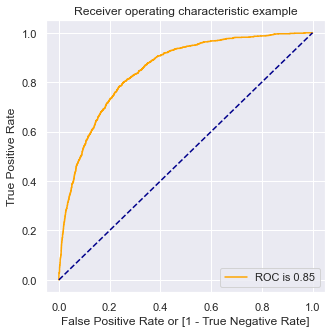

In [109]:
fpr,tpr,thresholds=metrics.roc_curve(y_train_pred_final["Churn"],y_train_pred_final["Churn_Prob"],drop_intermediate=False)
auc_score=metrics.roc_auc_score(y_train_pred_final["Churn"],y_train_pred_final["Churn_Prob"])
plt.plot(fpr,tpr,color="orange",label="ROC is {}".format(round(auc_score,2)))
plt.plot([0,1],[0,1],color="darkblue",linestyle="--")
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [110]:
nums=[float(i)/10 for i in range(10)]
for j in nums:
    y_train_pred_final[j]=np.where(y_train_pred_final["Churn_Prob"]>j,1,0)
    # Alternativeluy
    #y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > j else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,Cust_ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
879,0,0.214960,879,0,1,1,1,0,0,0,0,0,0,0
5790,0,0.331990,5790,0,1,1,1,1,0,0,0,0,0,0
6498,1,0.692814,6498,1,1,1,1,1,1,1,1,0,0,0
880,1,0.589529,880,1,1,1,1,1,1,1,0,0,0,0
2784,1,0.725186,2784,1,1,1,1,1,1,1,1,1,0,0


In [111]:
cutoff_diff=pd.DataFrame(columns=["prob",'accuracy','senstivity','specificity'])
nums=[float(i)/10 for i in range(10)]
for i in nums:
    # create confusion matrxi for ech point .0,.1,.2 and so on till 0.9
    cm1=metrics.confusion_matrix(y_train_pred_final["Churn"],y_train_pred_final[i])
    total1=sum(sum(cm1))
    # output- 4922
    accuracy=(cm1[0,0]+cm1[1,1])/total1
    senstivity=cm1[1,1]/(cm1[1,0]+cm1[1,1])
    specificity=cm1[0,0]/(cm1[0,0]+cm1[0,1])
    cutoff_diff.loc[i]=[i,accuracy,senstivity,specificity]
cutoff_diff.head()    

,prob,accuracy,senstivity,specificity
0.0,0.0,0.261479,1.000000,0.000000
0.1,0.1,0.616213,0.943279,0.500413
0.2,0.2,0.719017,0.856255,0.670426
0.3,0.3,0.770215,0.763015,0.772765
0.4,0.4,0.796424,0.651904,0.847593


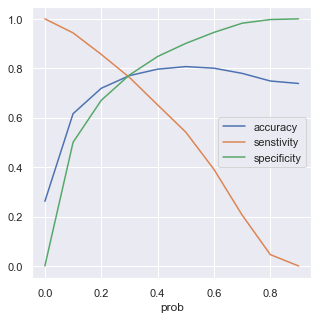

In [112]:
cutoff_diff.plot.line(x="prob",y=['accuracy','senstivity','specificity'])
plt.show()

## Here the optimal cut off is around 0.3

In [113]:
y_train_pred_final.head(3)

,Churn,Churn_Prob,Cust_ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
879,0,0.214960,879,0,1,1,1,0,0,0,0,0,0,0
5790,0,0.331990,5790,0,1,1,1,1,0,0,0,0,0,0
6498,1,0.692814,6498,1,1,1,1,1,1,1,1,0,0,0


In [114]:
y_train_pred_final["Final_pred"]=y_train_pred_final["Churn_Prob"].map(lambda x: 1 if x> 0.3 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,Cust_ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_pred
879,0,0.214960,879,0,1,1,1,0,0,0,0,0,0,0,0
5790,0,0.331990,5790,0,1,1,1,1,0,0,0,0,0,0,1
6498,1,0.692814,6498,1,1,1,1,1,1,1,1,0,0,0,1
880,1,0.589529,880,1,1,1,1,1,1,1,0,0,0,0,1
2784,1,0.725186,2784,1,1,1,1,1,1,1,1,1,0,0,1


In [115]:
# Let's check the overall accuracy
metrics.accuracy_score(y_train_pred_final["Churn"],y_train_pred_final["Final_pred"])

0.7702153596099147

In [116]:
# Create confusion metrcics
confusion2=metrics.confusion_matrix(y_train_pred_final["Churn"],y_train_pred_final["Final_pred"])
confusion2

array([[2809,  826],
       [ 305,  982]], dtype=int64)

In [117]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [118]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.763014763014763

In [119]:
# Let us calculate specificity
TN / float(TN+FP)

0.7727647867950481

In [120]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.22723521320495185


In [121]:
# Positive predictive value 
print (TP / float(TP+FP))

0.543141592920354


In [122]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9020552344251767


## Precision and Recall

In [123]:
Precision=TP/float(TP+FP)
Precision

0.543141592920354

In [124]:
Recall=TP/(TP+FN)
Recall

0.763014763014763

## Using sklearn utilities for the same

In [125]:
from sklearn.metrics import precision_score, recall_score

In [126]:
precision_score(y_train_pred_final["Churn"],y_train_pred_final["Final_pred"])

0.543141592920354

In [127]:
recall_score(y_train_pred_final["Churn"],y_train_pred_final["Final_pred"])

0.763014763014763

### Precision and recall tradeoff

In [128]:
from sklearn.metrics import precision_recall_curve

In [129]:
p,r,thresholds=precision_recall_curve(y_train_pred_final["Churn"],y_train_pred_final["Churn_Prob"])

In [130]:
p.shape

(4733,)

In [131]:
p[:-1].shape

(4732,)

In [132]:
r.shape

(4733,)

In [133]:
thresholds.shape

(4732,)

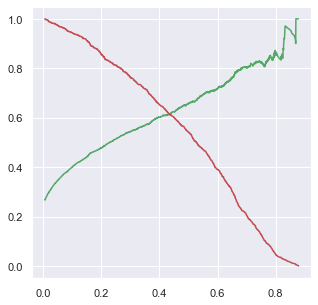

In [134]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Step 11: Making predictions on the test set

In [135]:
# As 'tenure','MonthlyCharges','TotalCharges' are the only continous variable rest all are binary

In [136]:
X_test[['tenure','MonthlyCharges','TotalCharges']]=scaler.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

In [137]:
cols=x.columns
X_test=X_test[cols]
X_test.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,SeniorCitizen,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,OnlineSecurity_Yes,OnlineBackup_Yes,TechSupport_Yes
942,-0.347623,1,1,0.499951,0,0,0,1,0,0,0,0
3730,0.999203,1,1,1.319685,0,0,0,1,0,0,1,0
1761,1.040015,1,1,-1.342374,0,0,1,1,0,0,0,0
2283,-1.286319,1,1,0.223935,0,0,0,0,1,0,0,0
1872,0.346196,1,0,-1.500335,0,0,1,0,0,0,0,0


In [138]:
# Add Constant
X_test_sm=sm.add_constant(X_test)
y_test_pred = logml.predict(X_test_sm)
y_test_pred[:10]

942     0.445066
3730    0.287639
1761    0.009486
2283    0.598467
1872    0.015765
1970    0.697569
2532    0.353758
1616    0.010074
2485    0.635189
5914    0.107920
dtype: float64

In [139]:
# Converting y_pred to a dataframe which is an array
y_test_l=pd.DataFrame(y_test_pred)
y_test_l.head()

,0
942,0.445066
3730,0.287639
1761,0.009486
2283,0.598467
1872,0.015765


In [140]:
# Converting y_test to dataframe
y_test_df=pd.DataFrame(y_test)
y_test_df.head()

,Churn
942,0
3730,1
1761,0
2283,1
1872,0


In [141]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [142]:
# Removing index for both dataframes to append them side by side 
y_test_l.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [143]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_test_l],axis=1)
y_pred_final.head()

,Churn,CustID,0
0,0,942,0.445066
1,1,3730,0.287639
2,0,1761,0.009486
3,1,2283,0.598467
4,0,1872,0.015765


In [144]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={0:"Churn_prob"})
y_pred_final.head()

,Churn,CustID,Churn_prob
0,0,942,0.445066
1,1,3730,0.287639
2,0,1761,0.009486
3,1,2283,0.598467
4,0,1872,0.015765


In [145]:
y_pred_final['final_predicted'] = y_pred_final.Churn_prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final.head()

,Churn,CustID,Churn_prob,final_predicted
0,0,942,0.445066,1
1,1,3730,0.287639,0
2,0,1761,0.009486,0
3,1,2283,0.598467,1
4,0,1872,0.015765,0


In [146]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.7843601895734598

In [147]:
confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion2


array([[1288,  240],
       [ 215,  367]], dtype=int64)

In [148]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [149]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6305841924398625

In [150]:
# Let us calculate specificity
TN / float(TN+FP)

0.8429319371727748